# Introduction to CNN and Computer vision with TF

### Getting the data

In [1]:
%ls ..\data\pizza_steak\train\steak

 Volume in drive E is Others
 Volume Serial Number is 4EBF-4A29

 Directory of e:\Studies\Github\deep-learning\data\pizza_steak\train\steak

12/14/2025  08:36 PM    <DIR>          .
12/14/2025  08:36 PM    <DIR>          ..
09/20/2019  10:06 PM            36,185 1000205.jpg
09/20/2019  10:06 PM            34,497 100135.jpg
09/20/2019  10:06 PM           116,802 101312.jpg
09/20/2019  10:06 PM            56,754 1021458.jpg
09/20/2019  10:06 PM            34,143 1032846.jpg
09/20/2019  10:06 PM            24,688 10380.jpg
09/20/2019  10:06 PM            37,134 1049459.jpg
09/20/2019  10:06 PM            49,841 1053665.jpg
09/20/2019  10:06 PM            59,983 1068516.jpg
09/20/2019  10:06 PM            28,996 1068975.jpg
09/20/2019  10:06 PM            29,525 1081258.jpg
09/20/2019  10:06 PM            49,577 1090122.jpg
09/20/2019  10:06 PM            59,976 1093966.jpg
09/20/2019  10:06 PM            60,253 1098844.jpg
09/20/2019  10:06 PM            69,843 1100074.jpg
09/20/2019  10:

In [2]:
import os

# Walk through the pizza_steak directory and list number of files.
for dirpath, dirnames, filenames in os.walk("..\data\pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '..\data\pizza_steak'.
There are 2 directories and 0 images in '..\data\pizza_steak\test'.
There are 0 directories and 250 images in '..\data\pizza_steak\test\pizza'.
There are 0 directories and 250 images in '..\data\pizza_steak\test\steak'.
There are 2 directories and 0 images in '..\data\pizza_steak\train'.
There are 0 directories and 750 images in '..\data\pizza_steak\train\pizza'.
There are 0 directories and 750 images in '..\data\pizza_steak\train\steak'.


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MSI\AppData\Local\Temp\ipykernel_18764\2881255389.py:4: SyntaxWarning: invalid escape sequence '\d'
  for dirpath, dirnames, filenames in os.walk("..\data\pizza_steak"):


In [3]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("../data/pizza_steak/train/steak"))
num_steak_images_train

750

In [4]:
num_pizza_images_train = len(os.listdir("../data/pizza_steak/train/pizza"))
num_pizza_images_train

750

In [5]:
# To visualize our images, first let's get the class names programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("../data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories.
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1) # randomly sample one of the items from target_folder

    img = mpimg.imread(target_folder + "/" + random_image[0]) # It will come as a list so we give [0]
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 424, 3)


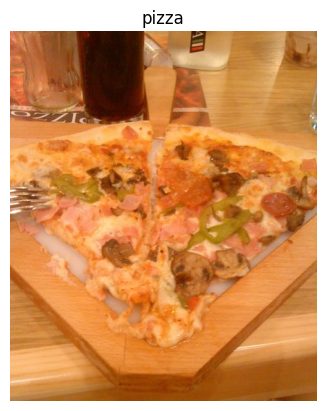

In [7]:
# View a random image from the training data-set
img = view_random_image(target_dir="../data/pizza_steak/train/",
                        target_class="pizza")

### An end to end example of CNN

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator is considered legacy. TensorFlow now prefers: tf.keras.utils.image_dataset_from_directory & tf.data pipelines

tf.random.set_seed(42)

# Preprocess the data(get all of the pixel values between 0 & 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "../data/pizza_steak/train"
test_dir = "../data/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42) # Takes the path to a directory and generates batches of augmented data

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model ( same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"), #Filters, kernel size and acti
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                     
])

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# We are able to just use train data and not x and y because the target labels and all that is automatically created by the flow_from_directory.
histor_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 445ms/step - accuracy: 0.6827 - loss: 0.5882 - val_accuracy: 0.7820 - val_loss: 0.4580
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7987 - loss: 0.4427 - val_accuracy: 0.8520 - val_loss: 0.3681
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8420 - loss: 0.3860 - val_accuracy: 0.8440 - val_loss: 0.3476
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8260 - loss: 0.3814 - val_accuracy: 0.8360 - val_loss: 0.3701
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8727 - loss: 0.3163 - val_accuracy: 0.8580 - val_loss: 0.3407


In [9]:
# 1. Kernel (Filter) Size
# The kernel (or filter) is a small matrix that slides over the image to extract features. It is the "window"
# Common sizes:
# 3×3 (most common)
# 5×5
# 7×7 (rare now)

# Example:
# Conv2D(filters=32, kernel_size=3)

# What it does
# Each kernel:
# looks at a local region
# detects patterns like:
# edges
# corners
# textures

# Why small kernels (3×3) dominate
# Fewer parameters
# Stack multiple layers → larger receptive field
# More nonlinearities
# Two stacked 3×3 convolutions ≈ one 5×5 receptive field, but:
# fewer parameters
# more expressive

# 2. Stride
# stride controls how far the kernel moves each step.

# Example:
# Conv2D(32, 3, strides=2)

# Effect
# Stride	Behavior
# 1	Slides one pixel at a time
# 2	Skips pixels (downsampling)
# Output size formula (no padding)

# reduces spatial resolution
# acts like pooling
# increases computational efficiency

# 3. Padding
# Padding adds extra pixels (usually zeros) around the image border.

# Types:
# valid → no padding
# same → output size = input size

# Example:
# Conv2D(32, 3, padding="same")

# Why padding is needed
# Without padding:
# image shrinks after every convolution
# border information is lost quickly


# Padding preserves:
# spatial dimensions
# edge features

# 4. Pooling
# Pooling reduces spatial dimensions while keeping important information.

# Most common:
# MaxPool2D(pool_size=2)

# Types
# Max Pooling
# Takes maximum value in window
# Keeps strongest activation

# Average Pooling
# Takes average
# Smooths features

# Why pooling is used
# Reduces computation
# Adds translation invariance
# Controls overfitting

# Example:
# Input: 112×112×32
# After MaxPool(2×2): 56×56×32

### Binary Classification: Let's break it down
1. Become one with the data (Visualize)
2. Preprocess the data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

Image shape: (341, 512, 3)
Image shape: (384, 512, 3)


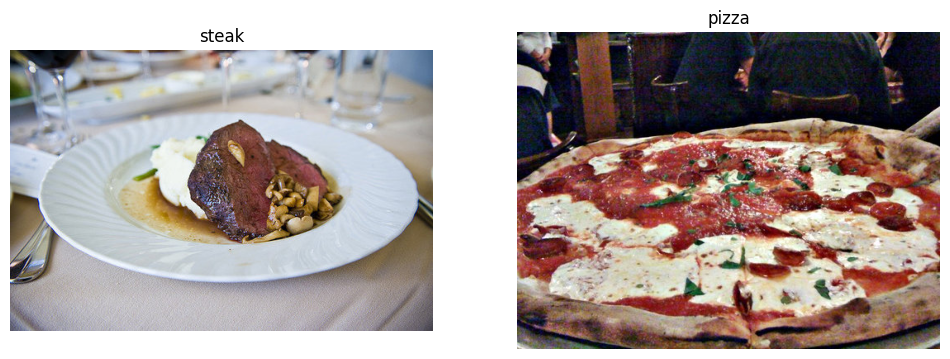

In [10]:
# Visualization
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # Number of rows, columns and this subplot column
steak_img = view_random_image("../data/pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("../data/pizza_steak/train/", "pizza")

In [11]:
# Preprocess the data (prepare it for a model)
# Define the directory dataset paths
train_dir = "../data/pizza_steak/train/"
test_dir = "../data/pizza_steak/test/"


In [12]:
# Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [13]:
# Load in our image data from directories and turn them into batches
# This function also auto labels them from the directory names
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
# Lets create a baseline CNN model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [15]:
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3),
           strides=(1,1), padding="same", # if same then output shape is same as input shape but if valid then output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (workin with binary classification so only 1 output neuron)
])

In [16]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [17]:
# check lengths of training and test data generators
len(train_data), len(test_data)


(47, 16)

In [18]:
# Fitting the model
history_2 = model_2.fit(train_data, # Combination of labels and sample data so dont need to pass x and y
                         epochs=5,
                          steps_per_epoch=len(train_data),
                           validation_data=test_data,
                            validation_steps=len(test_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.6720 - loss: 0.7086 - val_accuracy: 0.7880 - val_loss: 0.4483
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8220 - loss: 0.4269 - val_accuracy: 0.8140 - val_loss: 0.4353
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9140 - loss: 0.2455 - val_accuracy: 0.7960 - val_loss: 0.4475
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9800 - loss: 0.0723 - val_accuracy: 0.7720 - val_loss: 0.6226
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9960 - loss: 0.0239 - val_accuracy: 0.7560 - val_loss: 0.8023


<Axes: >

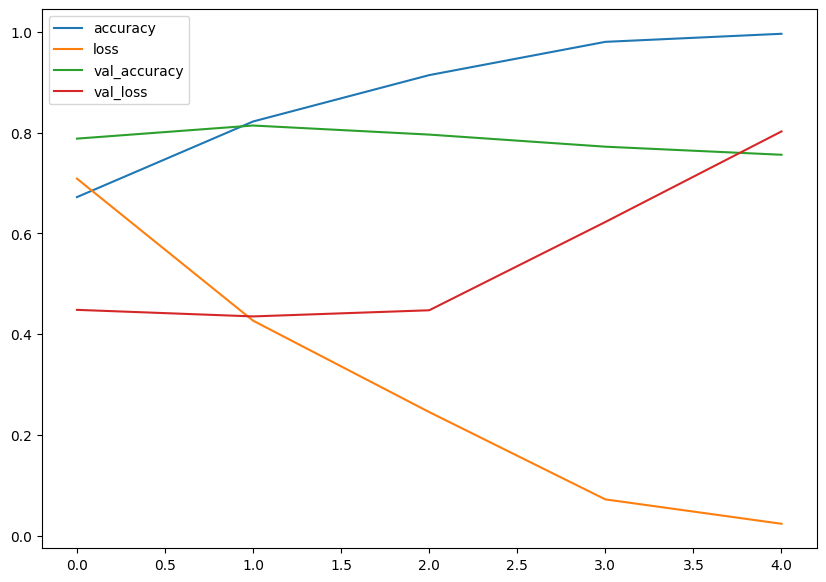

In [19]:
# Evaluation
# Lets plot the curve
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [20]:
# Creating a new baseline model that reduces overfitting with pooling layers
model_3 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# compile
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [22]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                          steps_per_epoch=len(train_data),
                           validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6620 - loss: 0.6332 - val_accuracy: 0.6820 - val_loss: 0.5993
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7800 - loss: 0.4861 - val_accuracy: 0.8360 - val_loss: 0.3759
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8293 - loss: 0.4182 - val_accuracy: 0.8700 - val_loss: 0.3401
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8293 - loss: 0.3938 - val_accuracy: 0.8520 - val_loss: 0.3294
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8460 - loss: 0.3714 - val_accuracy: 0.8820 - val_loss: 0.3189


### Reducing the overfitting with DATA Augmentation

In [23]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # How much we want to rotate an image
                                             shear_range=0.2, # How much we want to distort or shear an image
                                             zoom_range=0.2, # Zoom in or out randomly
                                             width_shift_range=0.2, # move image in x axis
                                             height_shift_range=0.3, # move image in y axis
                                             horizontal_flip=True) # Flip image horizontally

# Create IamgeDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
IMG_SIZE = (224, 224)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Create a model that uses data augmentation
model_4 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(), # 2 is by default
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.6473 - loss: 0.6344 - val_accuracy: 0.7260 - val_loss: 0.5479
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.6900 - loss: 0.5833 - val_accuracy: 0.7800 - val_loss: 0.4485
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.7200 - loss: 0.5507 - val_accuracy: 0.8400 - val_loss: 0.3849
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.7507 - loss: 0.5083 - val_accuracy: 0.8200 - val_loss: 0.4160
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - accuracy: 0.7620 - loss: 0.5022 - val_accuracy: 0.8640 - val_loss: 0.3526


In [26]:
# Since we've already beaten our baseline, there are a few things we could try:
# * Increase the number of model layers (add more conv2d/maxpool)
# * Increase number of filters in each conv layer (10 to 32 or even 64)
# * Train for longer (more epochs)
# * Find an ideal learning rate
# * Get more data
# * Use TRANSFER LEARNING to leverage what another image model has learn and adjust it for our own use-case

### Using a custom image to predict

In [27]:
# classes we are working with
print(class_names)

['pizza' 'steak']


In [28]:
# View our example image
import matplotlib.image as mpimg
pizza = mpimg.imread("../data/salami-pizza.jpg")

In [29]:
pizza

array([[[ 37,  33,  34],
        [ 30,  24,  26],
        [ 33,  29,  28],
        ...,
        [144,  78,  28],
        [142,  75,  30],
        [139,  75,  31]],

       [[ 35,  29,  31],
        [ 37,  33,  32],
        [ 39,  33,  33],
        ...,
        [139,  76,  25],
        [137,  73,  29],
        [138,  75,  32]],

       [[ 36,  30,  30],
        [ 38,  34,  33],
        [ 44,  38,  38],
        ...,
        [144,  76,  29],
        [140,  73,  28],
        [143,  82,  38]],

       ...,

       [[220, 191, 175],
        [219, 196, 180],
        [220, 198, 185],
        ...,
        [205, 146, 106],
        [204, 144, 107],
        [204, 144, 108]],

       [[222, 186, 172],
        [219, 193, 178],
        [219, 196, 182],
        ...,
        [205, 146, 106],
        [202, 143, 103],
        [202, 142, 106]],

       [[218, 191, 174],
        [217, 191, 176],
        [217, 190, 179],
        ...,
        [202, 144, 104],
        [200, 140, 103],
        [202, 144, 107]]

(np.float64(-0.5), np.float64(1343.5), np.float64(1639.5), np.float64(-0.5))

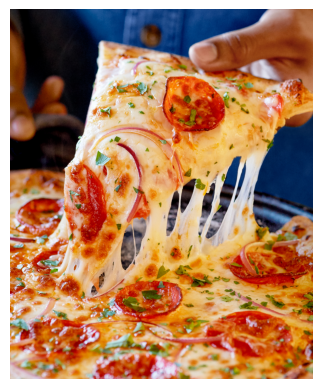

In [30]:
plt.imshow(pizza)
plt.axis("off")

In [31]:
pizza.shape

(1640, 1344, 3)

In [32]:
# Writing a helper function to preprocess images for the model
def load_and_prep_image(filename, img_shape=224):
    # Read in the file
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    #Resize the img
    img = tf.image.resize(img, [img_shape, img_shape])
    # Rescale the img and get all values between 0 & 1
    img = img/255.
    # Add batch dimension (model expects shape [batch, height, width, channels])
    img = tf.expand_dims(img, axis=0)
    return img

In [33]:
pizza = load_and_prep_image("../data/salami-pizza.jpg")
pizza

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.14054622, 0.12948179, 0.12328431],
         [0.15136555, 0.13795517, 0.14744398],
         [0.13746499, 0.14044118, 0.14492297],
         ...,
         [0.61537117, 0.3418067 , 0.13953081],
         [0.60854346, 0.3382703 , 0.14422269],
         [0.5917017 , 0.32345936, 0.12668069]],

        [[0.15917365, 0.14355741, 0.12976189],
         [0.16425069, 0.15518206, 0.1512605 ],
         [0.12405463, 0.12391458, 0.12804623],
         ...,
         [0.65518206, 0.3952731 , 0.22366947],
         [0.6371149 , 0.37436974, 0.20182073],
         [0.6312325 , 0.36659667, 0.18707985]],

        [[0.19772409, 0.16358544, 0.15339637],
         [0.15721288, 0.14152661, 0.1297619 ],
         [0.12552522, 0.12160365, 0.11568628],
         ...,
         [0.6585084 , 0.3957633 , 0.22909664],
         [0.64663863, 0.38350838, 0.21680672],
         [0.6333333 , 0.3682423 , 0.19292717]],

        ...,

        [[0.8419472 , 0.74782956, 

In [34]:
pred = model_4.predict(pizza) # If prediction probability over 0.5 then prediction likely to be the positive class and vice versa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [35]:
# Our prediction is currenty coming out as prediction probabilities. Wouldnt it be nice if we
# could visualize the image as well as the model's prediction?

In [36]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('pizza')

In [37]:
def pred_plot(model, filename, class_names=class_names):
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(img)

    # get the predicted class name
    pred_class = class_names[int(tf.round(pred))]

    # Plot the img and predicted class
    img = tf.squeeze(img, axis=0) # Squeezing to get rid of that extra dimension
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

In [38]:
filename = "../data/salami-pizza.jpg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


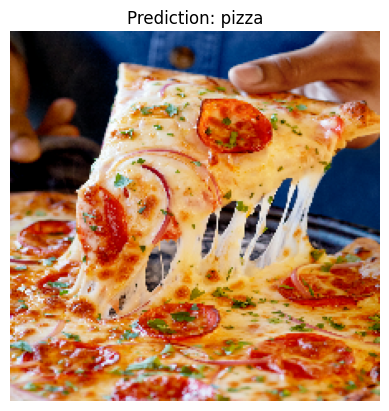

In [39]:
pred_plot(model=model_4,filename=filename)

### Multiclass Image Classification

In [40]:
# Setup the train and test directories
train_dir = "../data/10_food_classes_all_data/train/"
test_dir = "../data/10_food_classes_all_data/test/"

In [41]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (382, 512, 3)


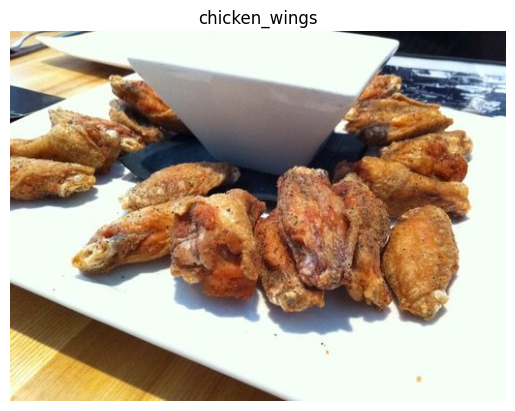

In [51]:
# Lets visualize our data
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
# Preprocess the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='categorical')